# Labwork assignment #2 for P130M100 Nonlinear Dynamical Models

## Cheatsheets
https://wch.github.io/latexsheet/ - Latex

## Notebook Link
http://nbviewer.jupyter.org/github/Felkin1/Nonlinear-Dynamic-Systems-Labworks/blob/master/Assignment%20%232.ipynb

## Initial programming environment preparations

In [1]:
import numpy as np
from sympy import dsolve, Eq, symbols, Function
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.core.display import HTML
from pylab import rcParams

In [57]:
%matplotlib inline
rc('animation', html='jshtml')
#rcParams['figure.figsize'] = 10, 5
HTML("""
<style>
.animation {
    display: table-cell;
    vertical-align: left;
    align: left;
}
</style>
""")

In [58]:
def init_fig():
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)
    #plt.close(fig)
    return fig,ax,line

def init():
    line, = ax.plot([], [], lw=2)
    line.set_data([], [])
    return (line,)

def animate(func,frames,interval):    
    plt.close(fig)
    return animation.FuncAnimation(fig, func, init_func=init,
                                       frames=frames, interval=interval, 
                                       blit=True)
    
def set_figure(ax,xlim,ylim,xlabel,ylabel,title):
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

## Task 1
### Outline
Follow the Lindstedt’s method description in the lecture notes (in Moodle). Note, that the method is
illustrated for Duffing’s equation and all computations are limited to $x_1$. Try to make one step forward – collect
the terms at $e^{2}$, use the expression of $x_1$, identify secular terms, and derive the expression of $x_2$. Symbolic
algebra tools are highly recommended for the execution of the task. Try to visualize the derived solutions – do
not forget that the time scale is transformed.

In [59]:
def x_func1():
    return np.linspace(0, 2, 1000)

def y_func1(x,i):
    return np.sin(2 * np.pi * (x - 0.01 * i))

def animate_test1(i):
    x = x_func1()
    y = y_func1(x,i)
    line.set_data(x, y)
    return (line,)

def plot_test1(i):
    x = x_func1()
    y = y_func1(x,i)
    return x,y

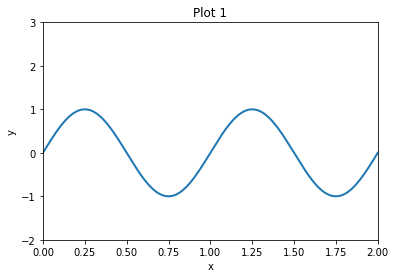

In [60]:
fig,ax,line = init_fig() 
x,y = plot_test1(0)
line.set_data(x,y)
set_figure(ax,(0,2),(-2,3),'x','y',"Plot 1")

In [61]:
fig,ax,line = init_fig() 
animation_1 = animate(animate_test1,100,20)
set_figure(ax,(0,2),(-2,3),'x','y',"Animated Plot 1")
animation_1

## Task 2
### Outline
Hopf bifurcation. Try to simulate a “real world” problem – the Brusselator model. Yes, you will not find the
description of this model in our lecture notes – therefore this is a “real world” problem. Try to search the web
– find the description of the model, construct the code for simulation, illustrate Hopf bifurcation. Remember
that Newmark method will not work – you will not be able to transform a system of two first order ODEs into
one second order ODE. Suggestion – use Euler, Adams or even RK integration method. What??? No problems –
search the web. Yes, you will feel like immersed into a “real world” environment. BTW, you are not requested
to simulate the Brusselator as a reaction diffusion system in two spatial dimensions. Self-organizing patterns is
another topic which we will reach later in the course (assume now that the Brusselator model is described by a
system of two first order ODEs with constant coefficients). Discuss what type of Hopf bifurcation you are able
to observe using this model.

## Task 3
### Outline
Homoclinic bifurcation. Part 1. Remember the last task from Lab 1? It’s a high time to return to the same
problem. Try to carefully illustrate the homoclinic bifurcation in this system. Explain in your own words – what
happens when the homoclinic bifurcation occurs in this system. Part 2. Consider the following model:
$\frac{d^2 y}{dx^2} + A\frac{dy}{dx} + y = y^3 - y^2\frac{dy}{dx}$. 
Use numerical integration to identify the critical value of the parameter $A$ where
the homoclinic bifurcation occurs.

## Task 4
### Outline
The hysteresis effect (the forced Duffing oscillator).
The model reads: $\frac{d^2 x}{dt^2} + 0.1\frac{d^2 x}{dt} + x + \alpha x^3 = 0.5 cos(\omega t)$. Set $\alpha$ = 0.1. Illustrate the jump effect by slowly
varying $\omega$ starting from 0 to 2 – and then on the opposite – starting from 2 to 0. What does it mean “slowly
varying”? It means that you are requested to run computational simulations and vary $\omega$ so slowly that it would
not affect the transient processes. You could vary $\omega$ in every time step by a tiny fraction – so tiny that it does
not show a vivid impact to the transient processes. What you are requested to plot? – $\omega$ on the horizontal axis
– and the amplitude of t|he steady state oscillations on the vertical axis. Repeat the simulation at $\alpha$ = −0.1.

## Task 5
### Outline
Period doubling bifurcations and road to chaos in a forced mathematical pendulum.
This paradigmatic model reads: $\frac{d^2 x}{dt^2} + h \frac{dx}{dt} + sin(x) = bcos(\omega t)$. Set $\omega$ = 2/3; $b$ = 2.048 and illustrate the
bifurcation diagram by slowly varying $h$ from 1.05 to 1. What are you requested to plot? - $h$ on the horizontal
axis – and Poincare section points of $\frac{dx}{dt}$ on the vertical axis. Comment the results.